In [5]:
!pip install autoviz
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 533.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 7.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 9.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 860.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle('tv_flat_file.pkl') 

In [2]:
#remove name - not relevant for prediction
df.drop(['name'], axis=1, inplace=True)

In [3]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [6]:
import openpyxl

# Type of valaues 
df.dtypes.to_excel("tv_datatype.xlsx",
             sheet_name='data_type')

# Maximum values 
numeric_df.max().to_excel("max_tv.xlsx",
             sheet_name='max')

# Minimum Values
numeric_df.min().to_excel("min_tv.xlsx",
             sheet_name='min')

# Missing Values
df.isnull().sum(axis=0).to_excel("NA_tv.xlsx",
             sheet_name='NA')

# exporting results to the protocol
df.nunique().to_excel("unique_tv.xlsx",
             sheet_name='unique')

In [7]:
df.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,episode_run_time
count,71403.000000,71403.000000,71403.000000,71403.000000,71403.000000,71403,71403,71403.000000,71403.000000
mean,150929.961766,1.389017,17.398919,16.135470,2.730272,2020-02-08 06:27:36.837947904,2020-08-19 00:13:13.054018048,5.338562,20.493537
min,344.000000,1.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00,1982-10-04 00:00:00,0.000000,0.000000
25%,97707.000000,1.000000,3.000000,0.000000,0.000000,2018-01-30 00:00:00,2018-10-26 00:00:00,0.600000,0.000000
50%,132987.000000,1.000000,8.000000,0.000000,0.000000,2020-06-08 00:00:00,2021-02-08 00:00:00,1.054000,0.000000
75%,214371.000000,1.000000,17.000000,1.000000,6.700000,2022-03-22 00:00:00,2022-09-22 00:00:00,2.744000,42.000000
max,251181.000000,75.000000,2107.000000,17836.000000,10.000000,2024-01-01 00:00:00,2024-08-24 08:06:01.304283,3707.008000,6032.000000
std,60158.829023,1.258963,42.770469,212.168664,3.619784,NaN,NaN,40.707498,44.415187


In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
numeric_df.corr()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
id,1.000000,-0.145740,-0.122201,-0.077666,-0.300401,-0.027477,-0.171129
number_of_seasons,-0.145740,1.000000,0.375574,0.070729,0.121046,0.086985,0.044907
number_of_episodes,-0.122201,0.375574,1.000000,0.035064,0.115489,0.319020,0.050789
vote_count,-0.077666,0.070729,0.035064,1.000000,0.106521,0.157802,0.025533
vote_average,-0.300401,0.121046,0.115489,0.106521,1.000000,0.099603,0.187031
popularity,-0.027477,0.086985,0.319020,0.157802,0.099603,1.000000,0.020385
episode_run_time,-0.171129,0.044907,0.050789,0.025533,0.187031,0.020385,1.000000


<Axes: >

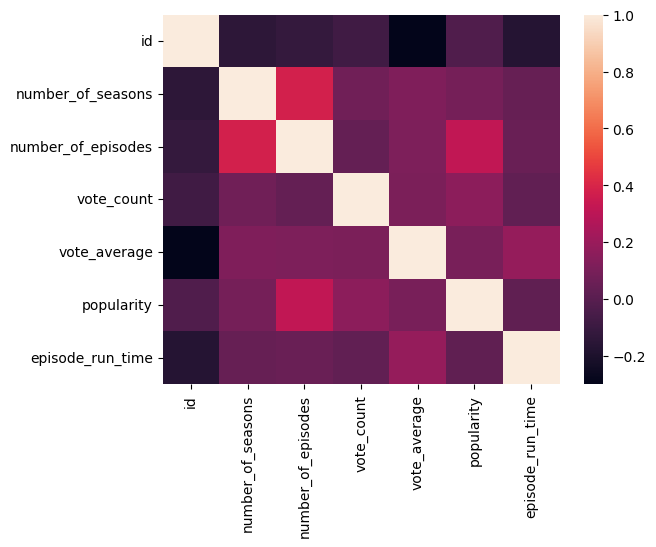

In [10]:
sb.heatmap(numeric_df.corr())

In [11]:
genres = df.filter(regex='^genres_')
average_popularity = {genre: df[df[genre] == True]['popularity'].mean() for genre in genres}
popularity_df = pd.DataFrame(list(average_popularity.items()), columns=['Genre', 'Average Popularity'])
popularity_df

,Genre,Average Popularity
0,genres_Crime,8.843701
1,genres_Drama,10.455786
2,genres_Sci-Fi & Fantasy,17.724189
3,genres_Mystery,8.827753
4,genres_Action & Adventure,19.787814
5,genres_Comedy,9.761330
6,genres_Animation,13.448630
7,genres_Western,22.978750
8,genres_Family,12.362375
9,genres_Kids,10.870204


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

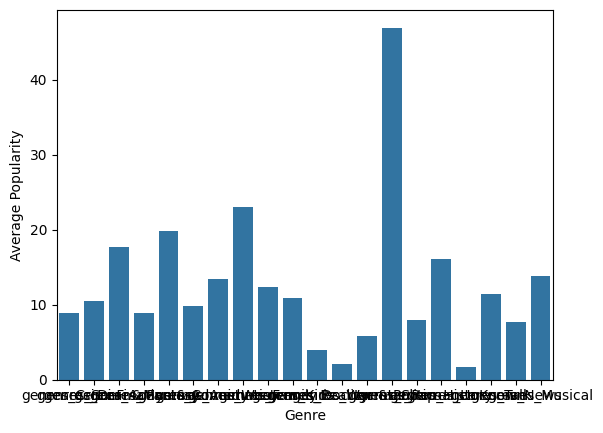

In [12]:
import seaborn as sns
sns.barplot(x='Genre', y='Average Popularity', data=popularity_df)
plt

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (71403, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,97,344.000000,251181.000000,No issue
number_of_seasons,int64,0.000000,0,1.000000,75.000000,Column has 13042 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
number_of_episodes,int64,0.000000,0,0.000000,2107.000000,Column has 7097 outliers greater than upper bound (38.00) or lower than lower bound(-18.00). Cap them or remove them.
vote_count,int64,0.000000,1,0.000000,17836.000000,Column has 13271 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
vote_average,float64,0.000000,NA,0.000000,10.000000,No issue
popularity,float64,0.000000,NA,0.000000,3707.008000,Column has 9680 outliers greater than upper bound (5.98) or lower than lower bound(-2.63). Cap them or remove them.
episode_run_time,int64,0.000000,0,0.000000,6032.000000,Column has 1055 outliers greater than upper bound (105.00) or lower than lower bound(-63.00). Cap them or remove them.


Number of All Scatter Plots = 3


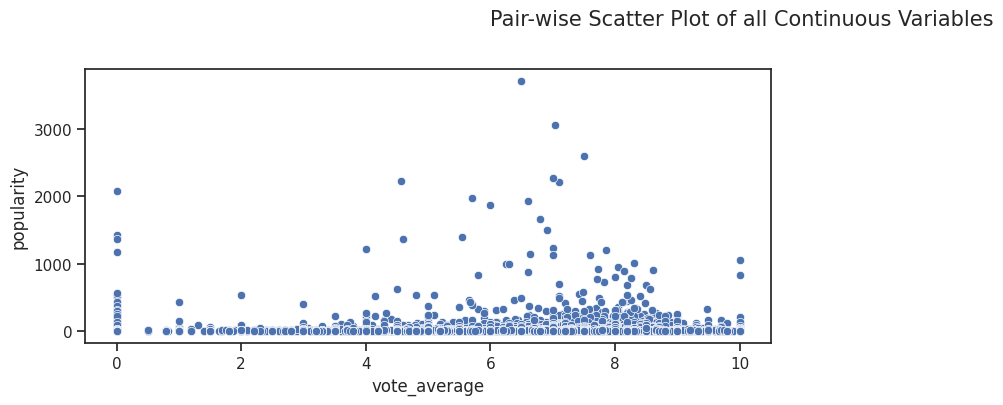

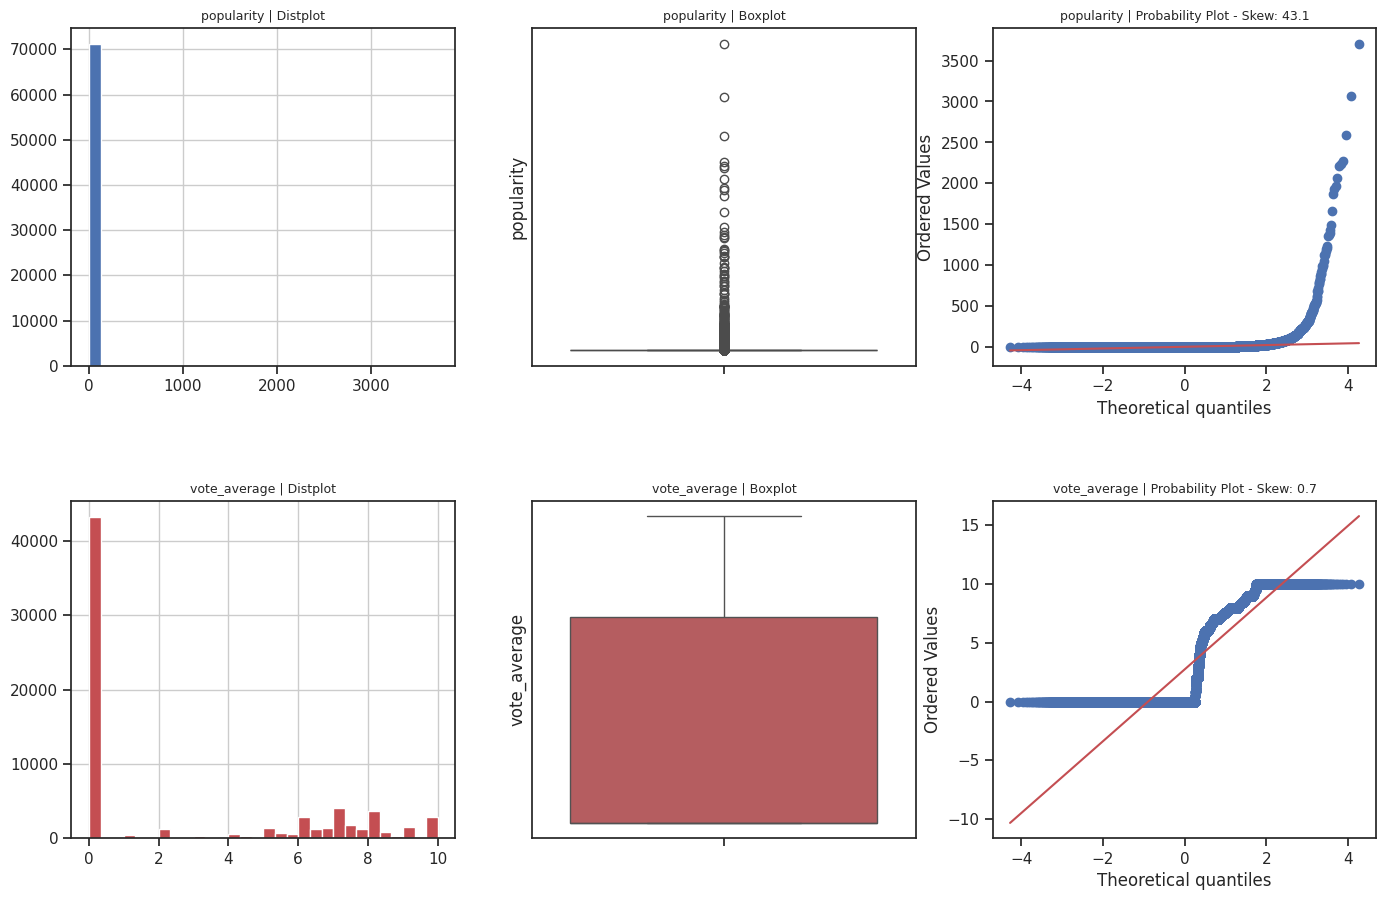

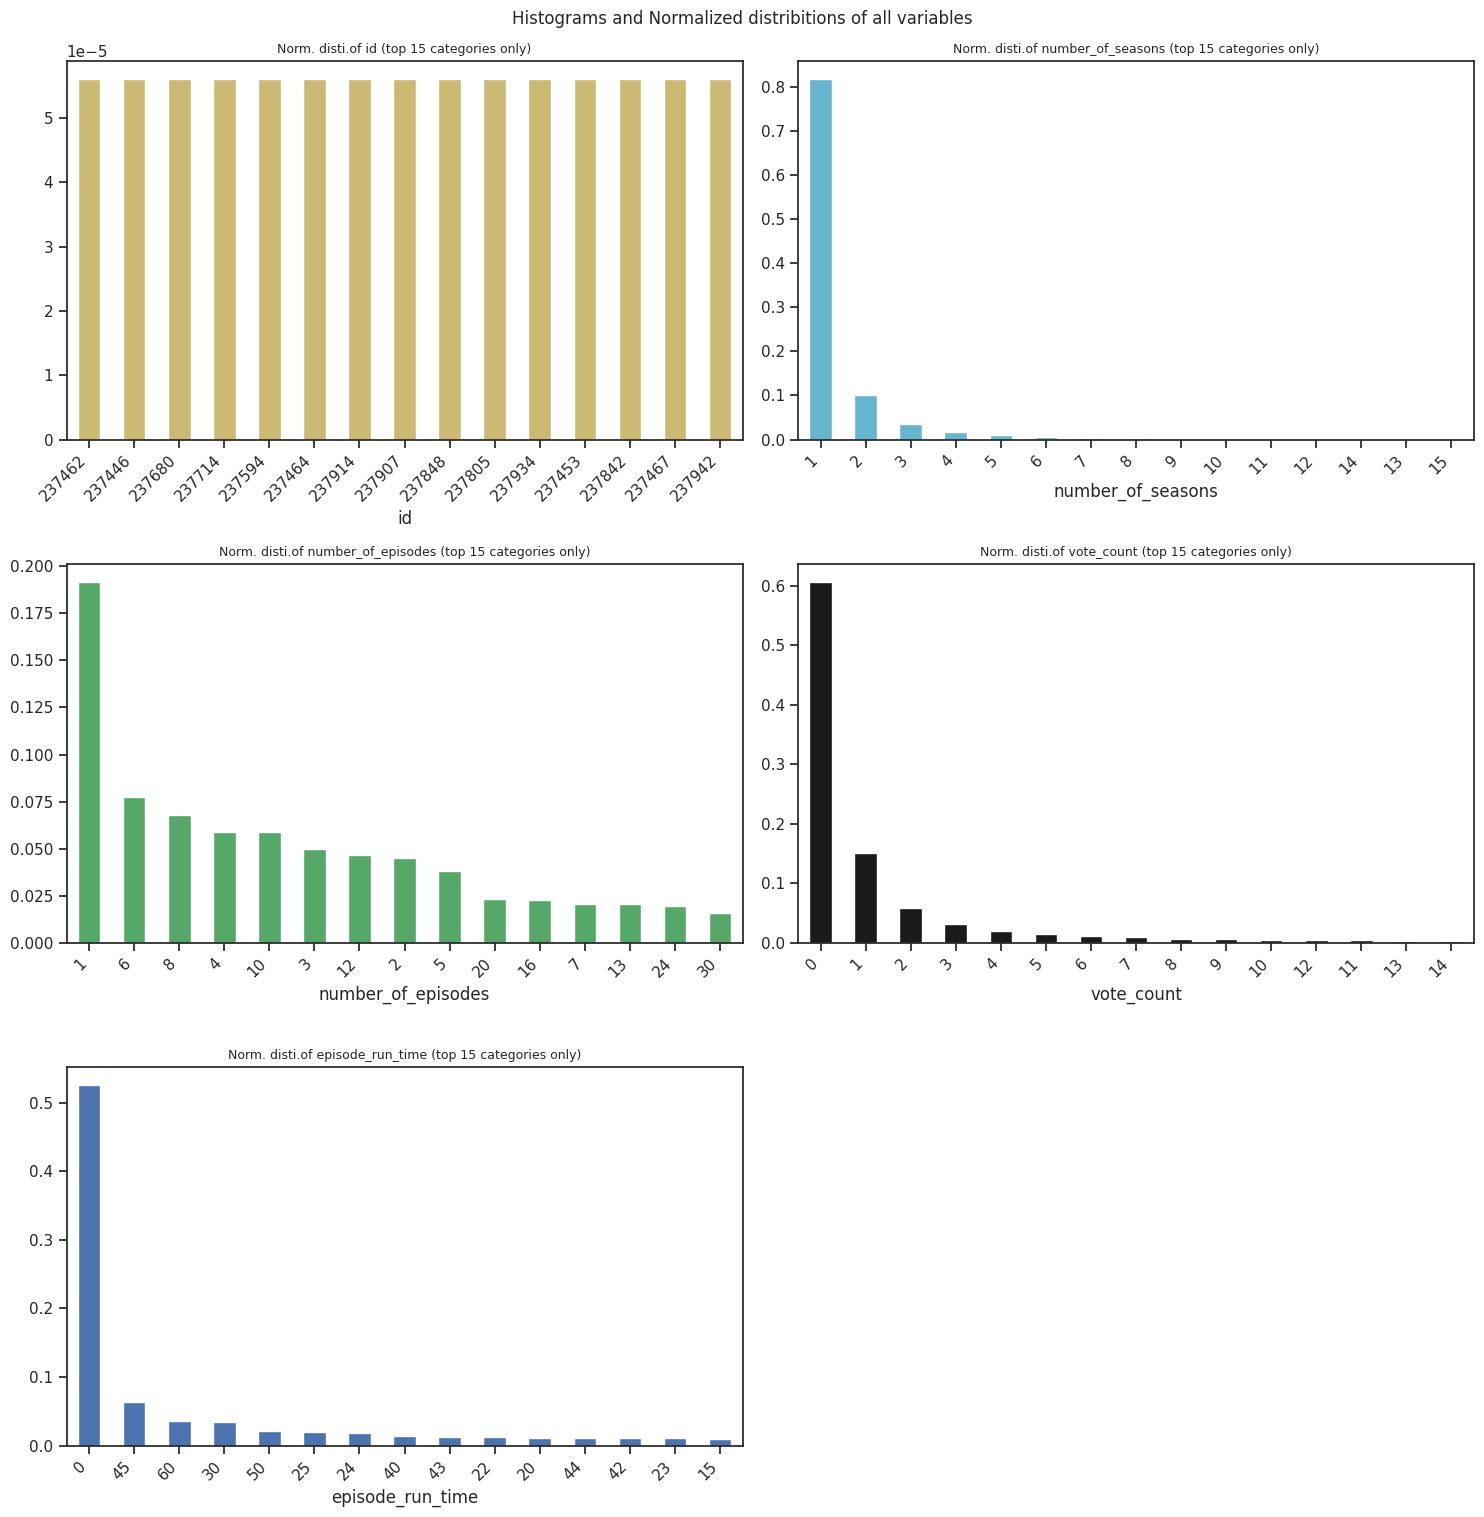

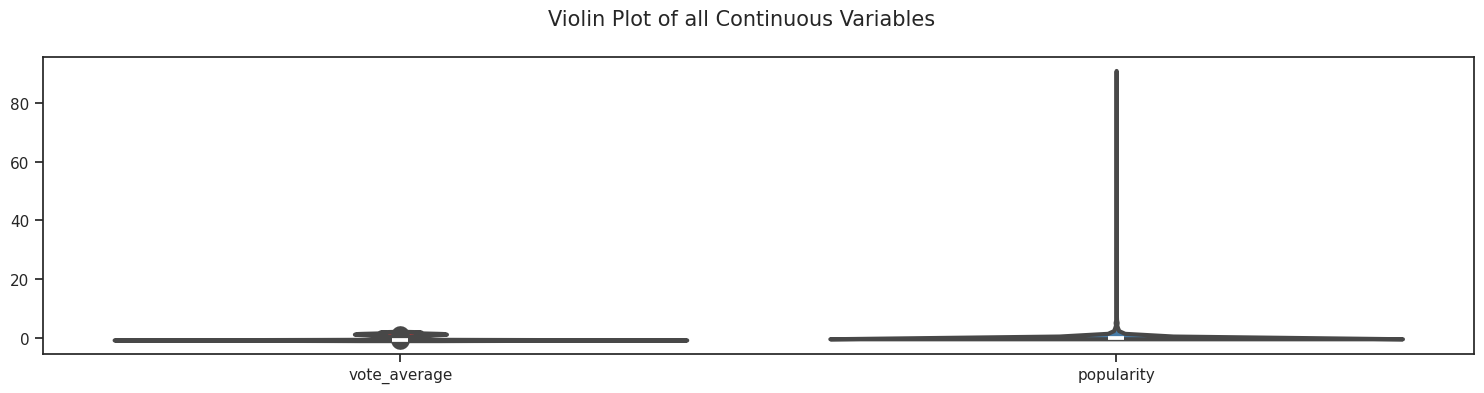

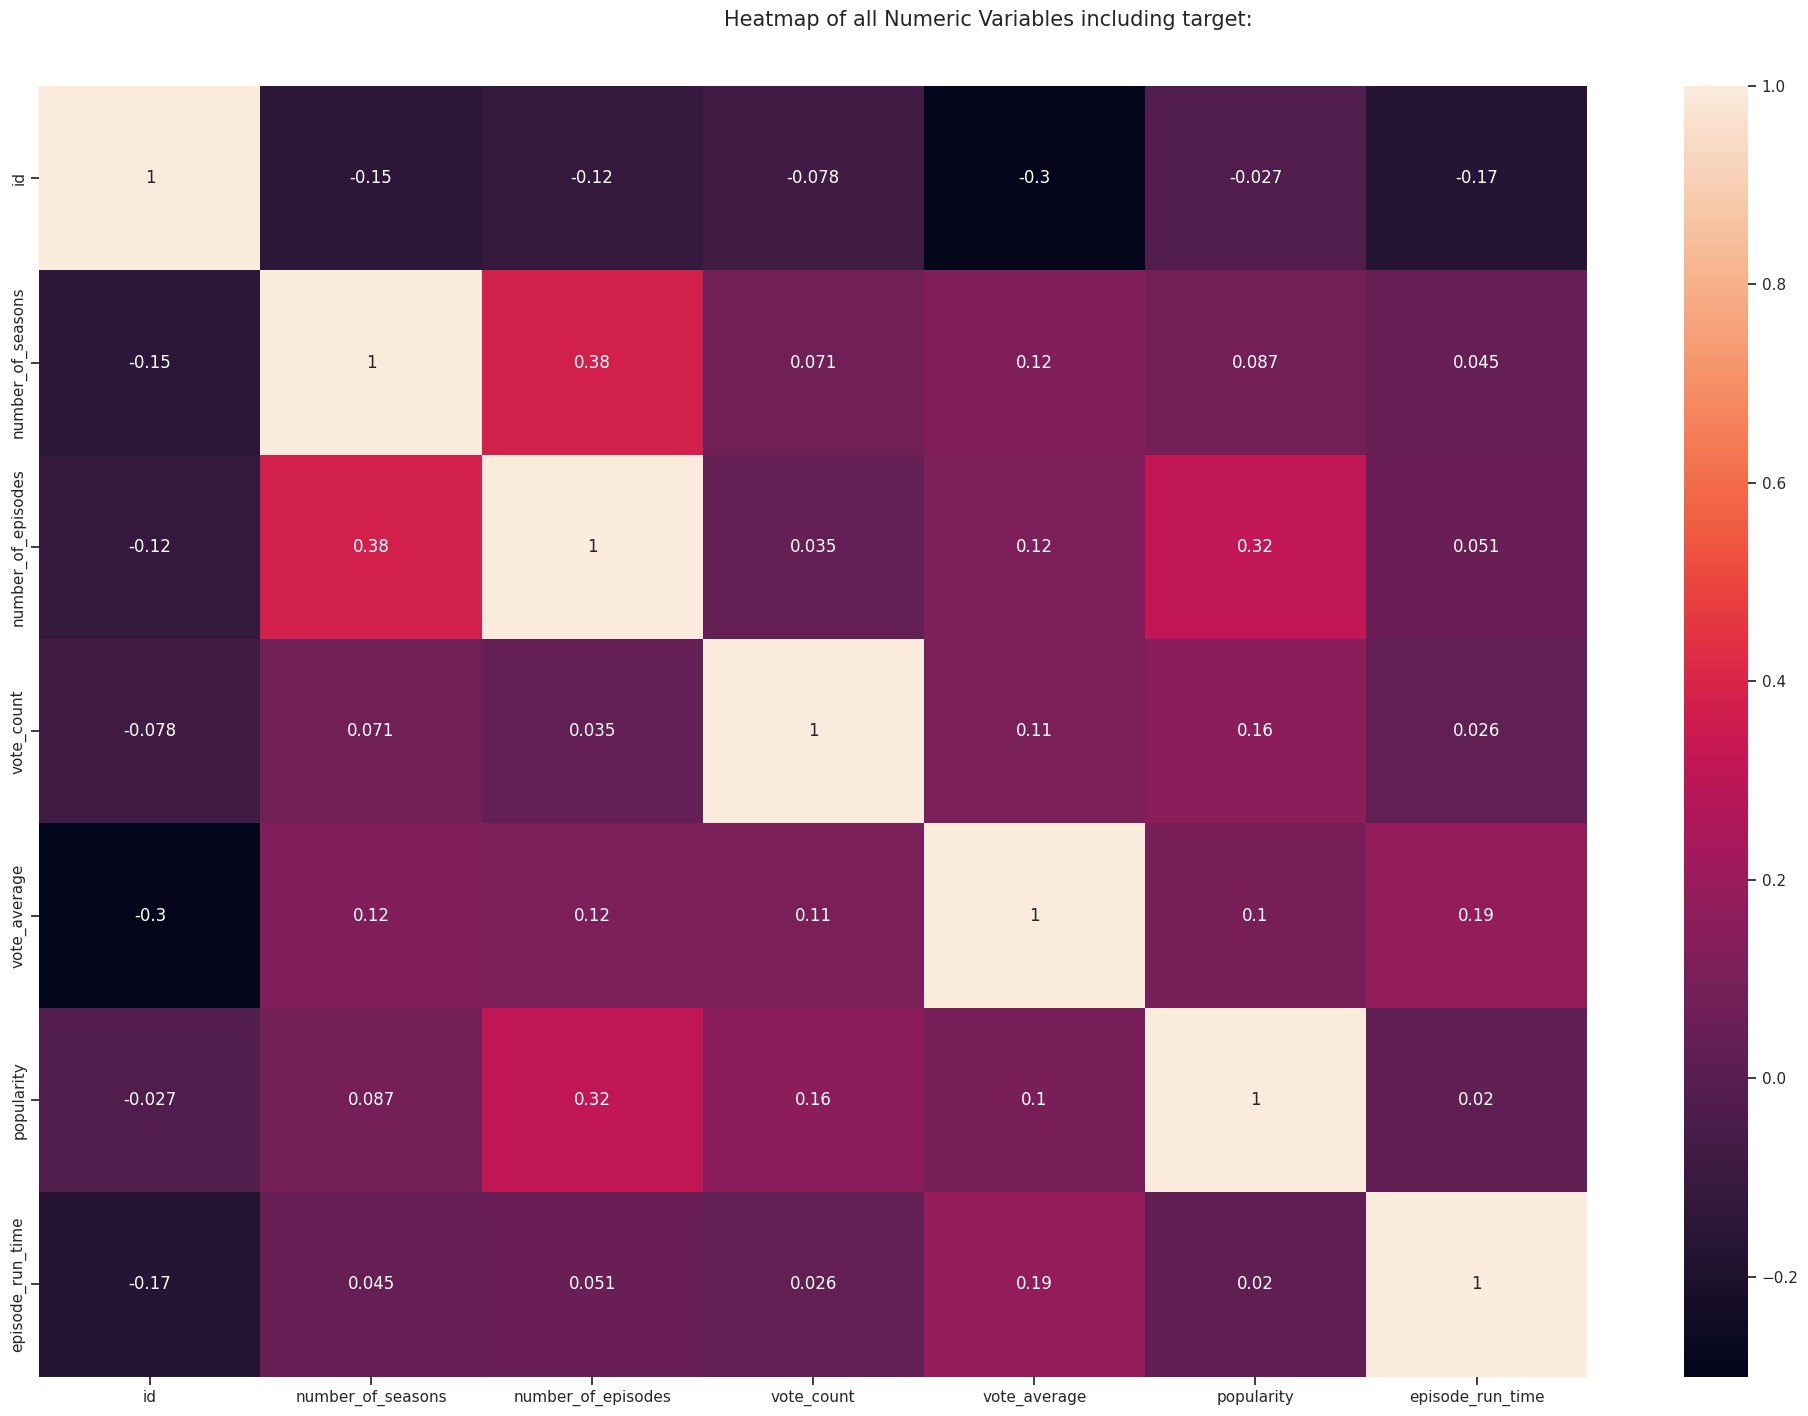

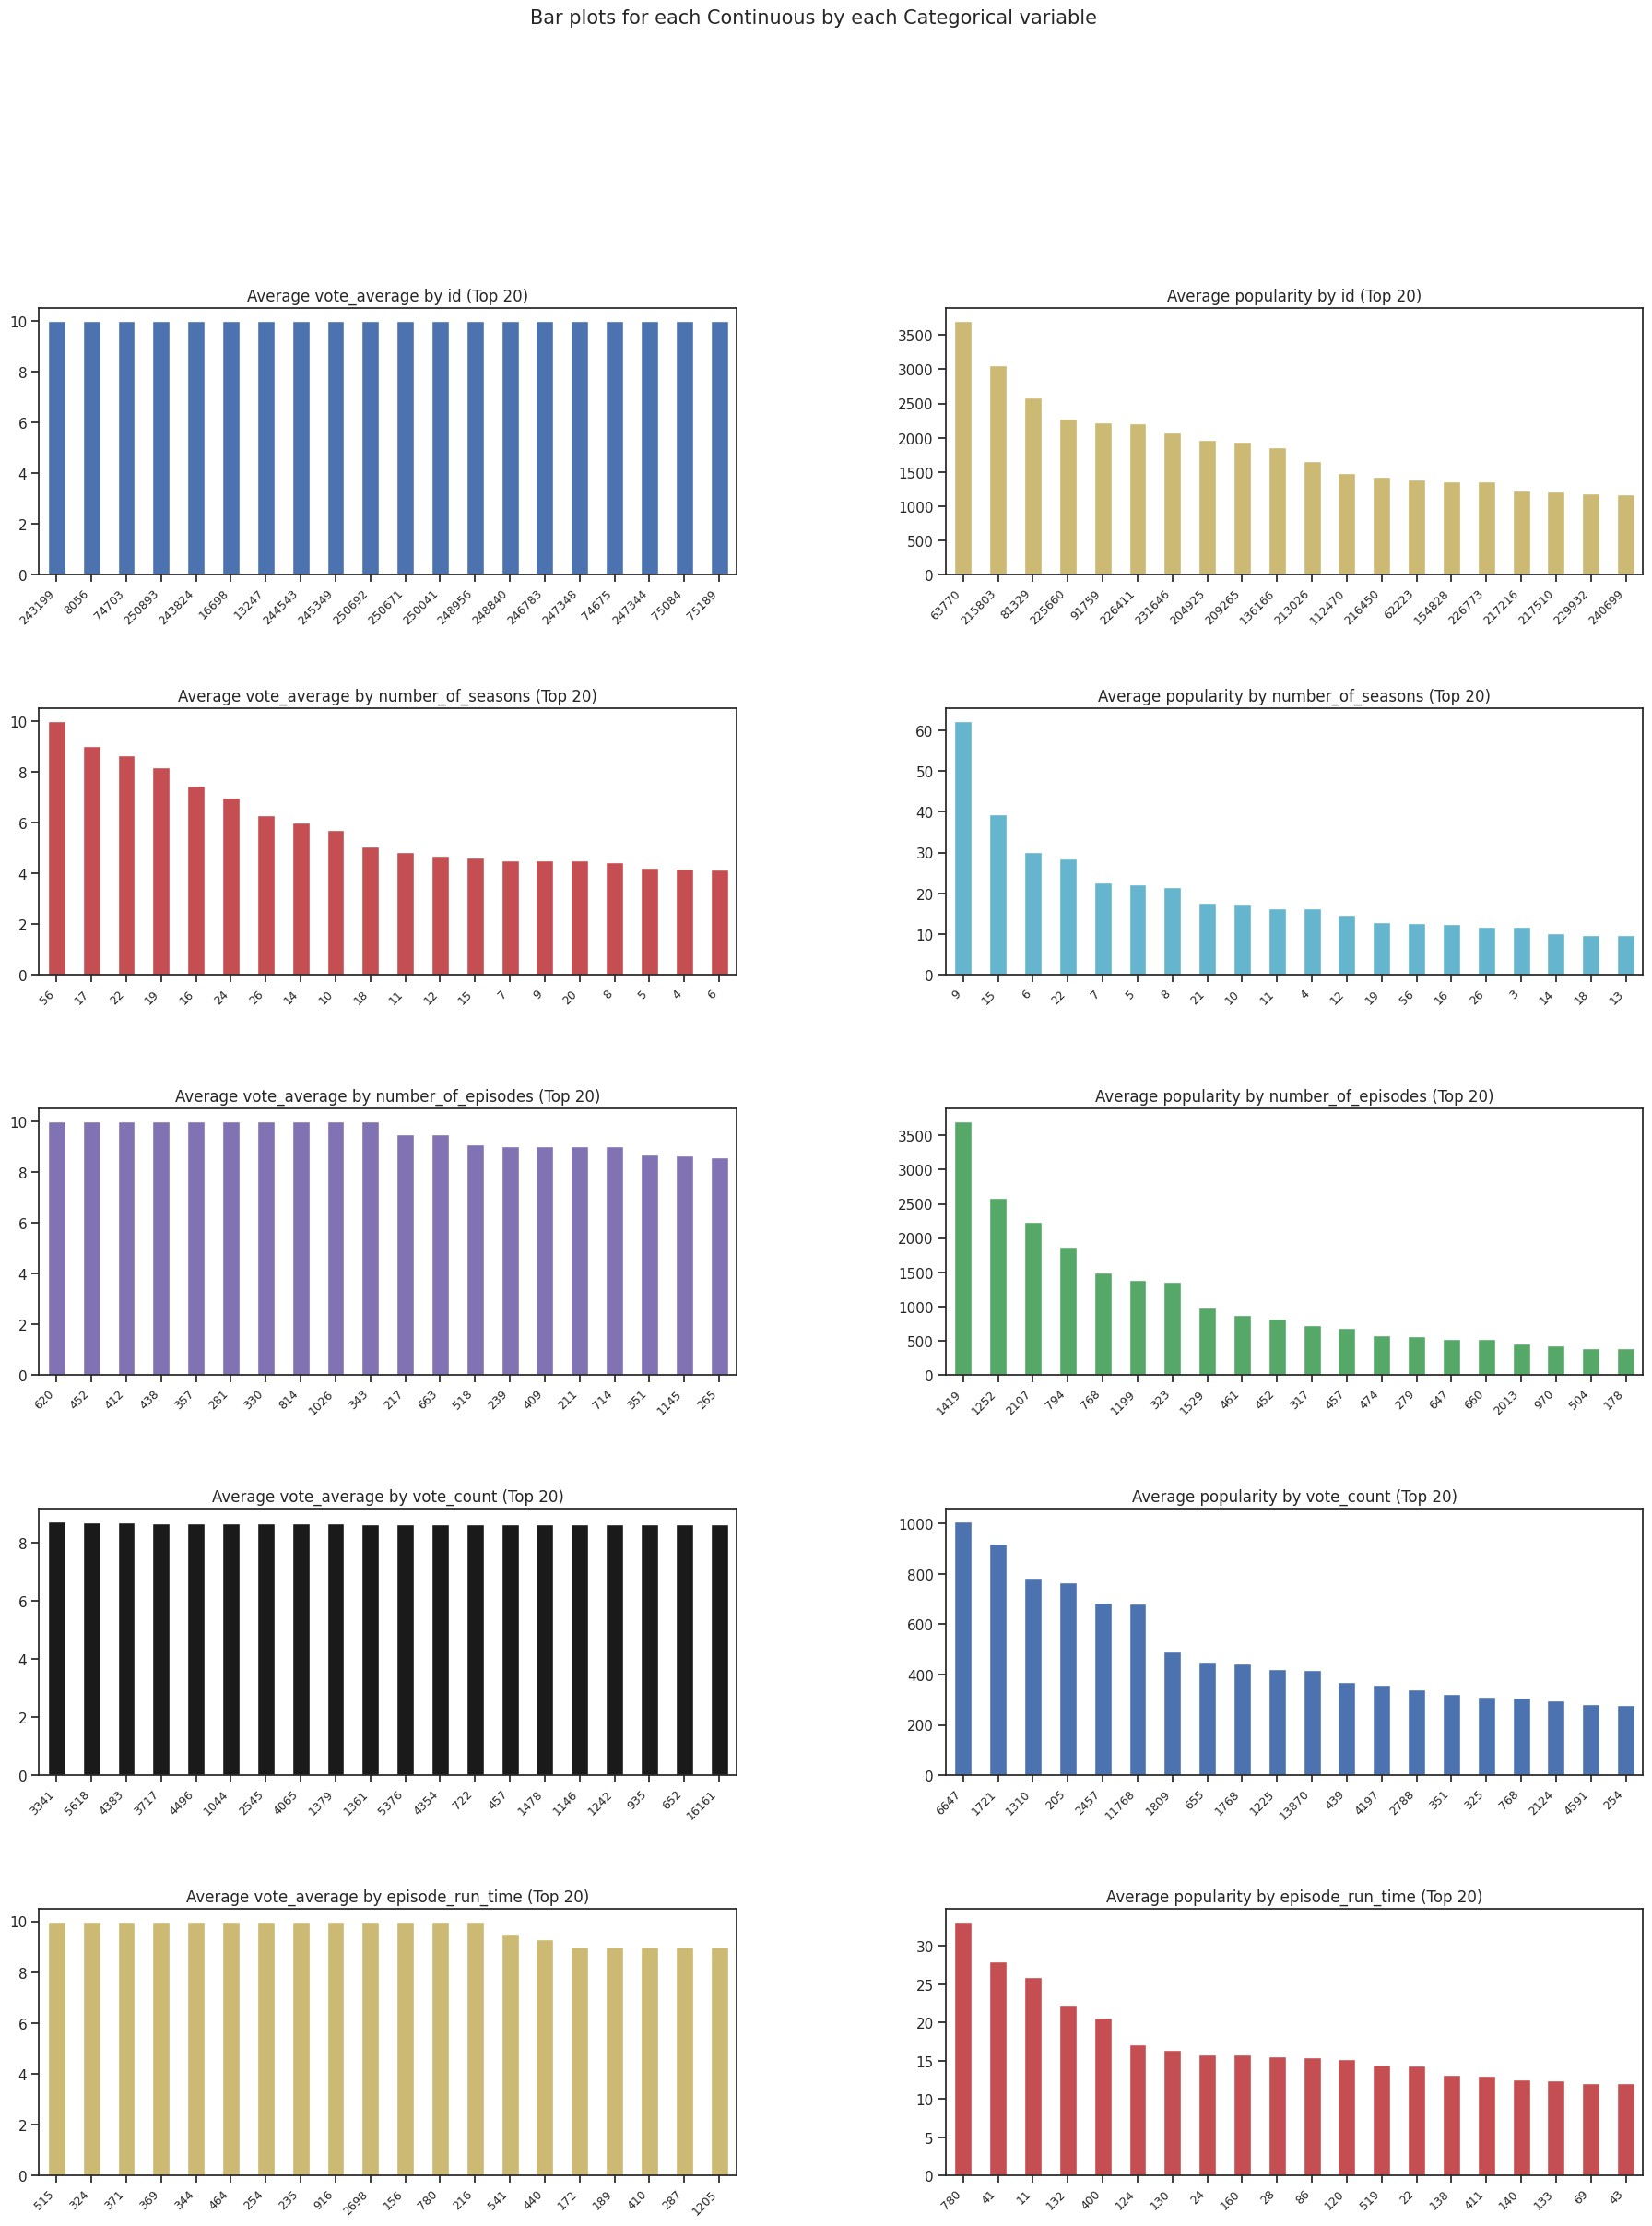

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
0,71446,3,41,17836,8.257,96.354,70
1,66732,4,34,16161,8.624,185.711,0
2,63174,6,93,13870,8.486,416.668,45
3,69050,7,137,13180,8.479,143.750,45
4,93405,2,9,13053,7.831,115.587,0
...,...,...,...,...,...,...,...
71398,240293,1,32,0,0.000,3.710,0
71399,240693,1,8,0,0.000,3.028,0
71400,239099,1,1,0,0.000,1.400,0
71401,240696,1,1,0,0.000,1.895,0


In [13]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(numeric_df)

In [14]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative

df_skew = numeric_df.skew()

In [15]:
df_skew

id                     0.179830
number_of_seasons     11.408326
number_of_episodes    14.926498
vote_count            43.005340
vote_average           0.731580
popularity            43.146235
episode_run_time      46.602097
dtype: float64

In [16]:
# Step 1: Identify the top 10 original_language
top_10_original_language = df['original_language'].value_counts().nlargest(10).index

# Step 2: Replace languages not in the top 10 with 'Other' 
#         (including None values who previously were 'Empty')
df['original_language'] = df['original_language'].apply(lambda x: x if x in top_10_original_language else 'Other')
df['original_language'] = df['original_language'].replace('Empty', 'Other')

df['original_language'] = df['original_language'].astype('category')

df['original_language'].value_counts()

original_language
en       21964
Other    14638
zh        8259
ja        5679
ko        5553
fr        3972
de        2915
es        2811
pt        2035
nl        1988
ar        1589
Name: count, dtype: int64

In [17]:
!pip install pycountry pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 4.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 8.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.7/234.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pluggy
    Found existing installation: pluggy 1.0.0
    Uninstalling pluggy-1.0.0:
      Successfully uninstalled pluggy-1.0.0


In [18]:
#!pip install pycountry pycountry-convert
import pycountry
import pycountry_convert as pc

# Initialize an empty dictionary to store the mapping
country_to_continent = {}

# Iterate over all countries recognized by pycountry
for country in pycountry.countries:
    try:
        # Get the Alpha-2 code for the country
        country_code = country.alpha_2
        
        # Convert the country code to a continent code
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        
        # Convert the continent code to the continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        # Store the mapping in the dictionary
        country_to_continent[country_code] = continent_name
    
    except KeyError:
        # Handle exceptions where a country code might not map to a continent
        country_to_continent[country_code] = 'Unknown'

# Display the first few entries of the mapping
#for country_code, continent_name in list(country_to_continent.items())[:250]:
#    print(f'{country_code}: {continent_name}')

df['origin_continent'] = df['origin_country'].map(country_to_continent)
df = df.drop('origin_country', axis=1)

df['origin_continent'] = df['origin_continent'].astype('category')

In [19]:
#remove last_air_date and in_production columns due to large precentage of mistaks and per Orit instructions
#df = df.drop('last_air_date', axis=1)
df = df.drop('in_production', axis=1)

In [20]:
import seaborn as sns

# Filter out the categorical columns
categorical_df = df.select_dtypes(include=['category'])

plot_categorical = lambda col: sns.countplot(x=col, data=categorical_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'ar'),
  Text(2, 0, 'de'),
  Text(3, 0, 'en'),
  Text(4, 0, 'es'),
  Text(5, 0, 'fr'),
  Text(6, 0, 'ja'),
  Text(7, 0, 'ko'),
  Text(8, 0, 'nl'),
  Text(9, 0, 'pt'),
  Text(10, 0, 'zh')])

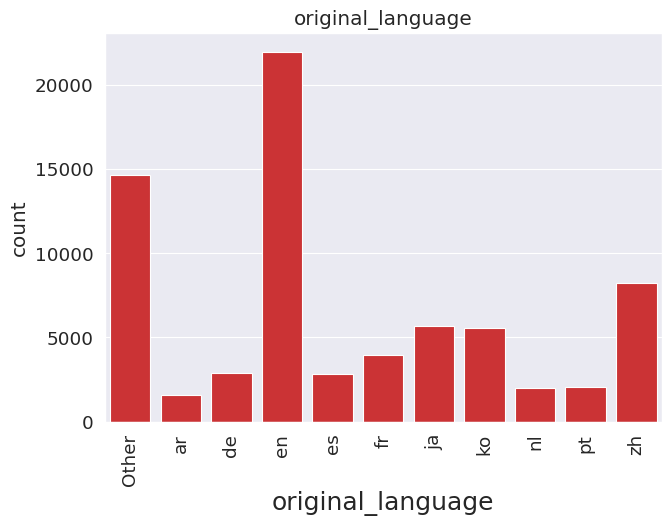

In [122]:
#print 'origin_language' 
sns.set_context("paper", font_scale=1.5)
sb.countplot(x=categorical_df['original_language'])
plt.title('{}'.format('original_language'))
plt.xlabel('original_language', fontsize=18)
plt.xticks(rotation=90)

In [21]:
categorical_df = categorical_df.drop('original_language', axis = 1)
categorical_df = categorical_df.drop('networks', axis = 1)

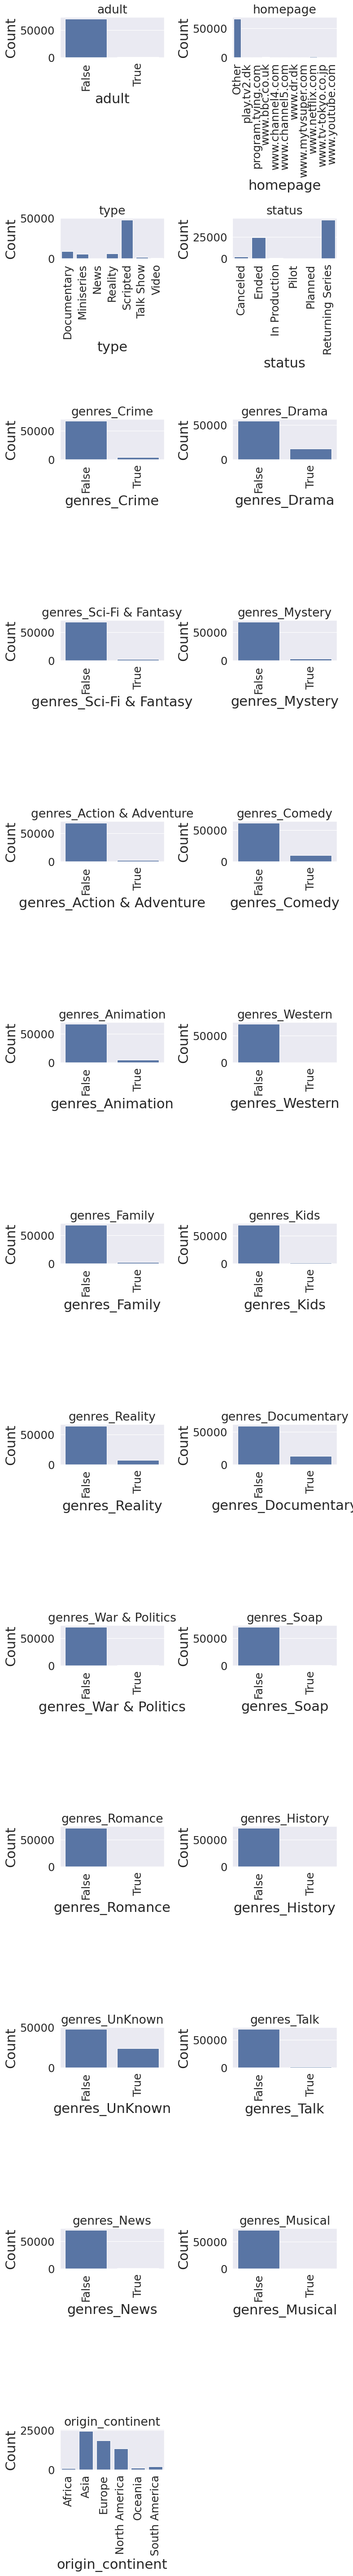

In [22]:
a = 14  # number of rows
b = 2  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(8,60))
plt.subplots_adjust(hspace = 2)
plt.subplots_adjust(wspace = 1)
sb.set(font_scale = 2)
sns.set_context("paper", font_scale=2)

for i in categorical_df:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i, fontsize=22)
        plt.ylabel('Count', fontsize=22)       
        sb.countplot(x=categorical_df[i])
        plt.xticks(rotation=90)
        c = c + 1

plt.tight_layout()

plt.show()

Text(0, 0.5, 'Frequency')

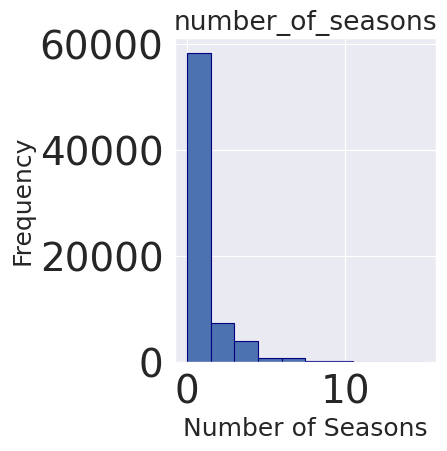

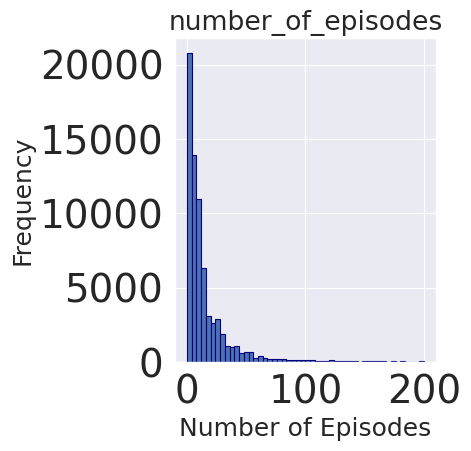

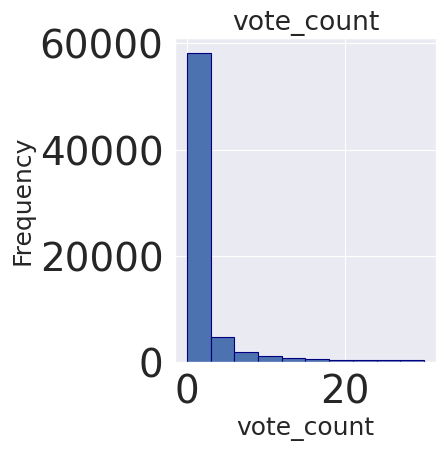

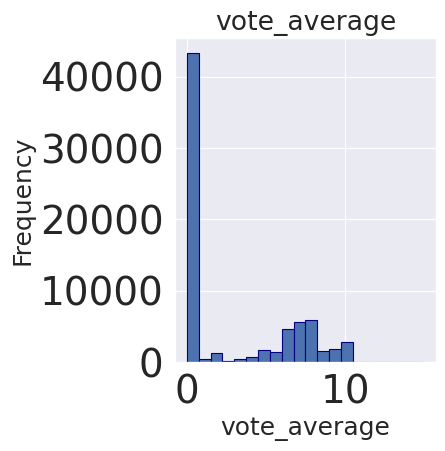

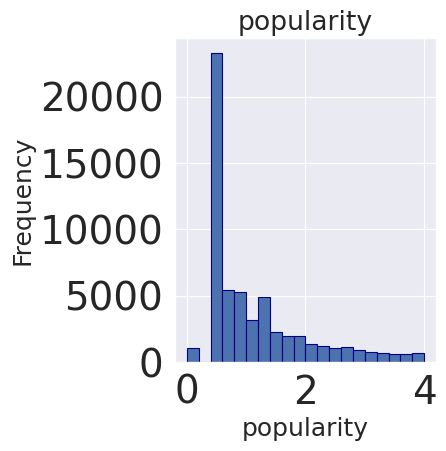

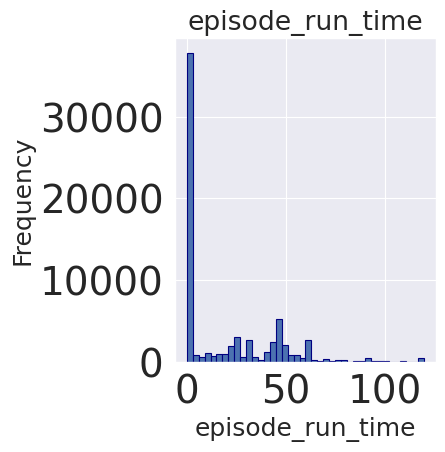

In [23]:
numeric_df.hist(column = 'number_of_seasons', figsize=(3, 4), bins=10, range=(0, 15), xlabelsize=28, ylabelsize=28, edgecolor='navy')
# Adding x-axis and y-axis labels
plt.xlabel('Number of Seasons', fontsize=18)  # Add x-axis label
plt.ylabel('Frequency', fontsize=18)          # Add y-axis label

numeric_df.hist(column = 'number_of_episodes', figsize=(3, 4), bins=50, range=(0, 200), xlabelsize=28, ylabelsize=28, edgecolor='navy')
# Adding x-axis and y-axis labels
plt.xlabel('Number of Episodes', fontsize=18)  # Add x-axis label
plt.ylabel('Frequency', fontsize=18)          # Add y-axis label

numeric_df.hist(column = 'vote_count', figsize=(3, 4), bins=10, range=(0, 30), xlabelsize=28, ylabelsize=28, edgecolor='navy')
# Adding x-axis and y-axis labels
plt.xlabel('vote_count', fontsize=18)  # Add x-axis label
plt.ylabel('Frequency', fontsize=18)          # Add y-axis label

numeric_df.hist(column = 'vote_average', figsize=(3, 4), bins=20, range=(0, 15), xlabelsize=28, ylabelsize=28, edgecolor='navy')
# Adding x-axis and y-axis labels
plt.xlabel('vote_average', fontsize=18)  # Add x-axis label
plt.ylabel('Frequency', fontsize=18)          # Add y-axis label

numeric_df.hist(column = 'popularity', figsize=(3, 4), bins=20, range=(0, 4), xlabelsize=28, ylabelsize=28, edgecolor='navy')
# Adding x-axis and y-axis labels
plt.xlabel('popularity', fontsize=18)  # Add x-axis label
plt.ylabel('Frequency', fontsize=18)          # Add y-axis label

numeric_df.hist(column = 'episode_run_time', figsize=(3, 4), bins=40, range=(0, 120), xlabelsize=28, ylabelsize=28, edgecolor='navy')
# Adding x-axis and y-axis labels
plt.xlabel('episode_run_time', fontsize=18)  # Add x-axis label
plt.ylabel('Frequency', fontsize=18)          # Add y-axis label

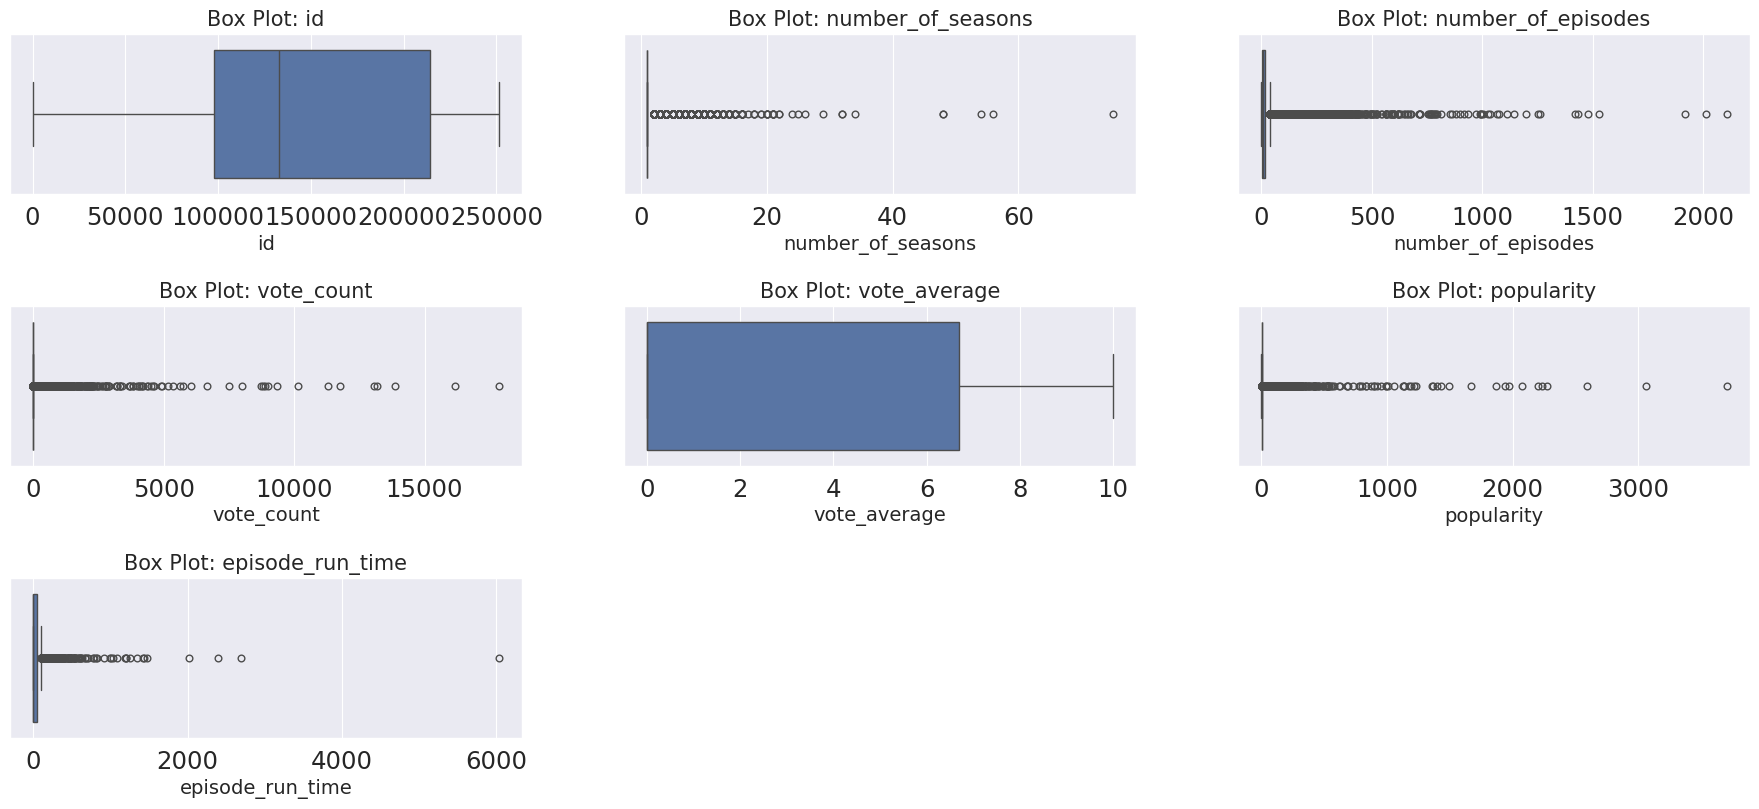

In [24]:
# Define the function to plot box plots for each numeric column
def outliers_boxplot(df):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(df.columns):
        ax = plt.subplot(60, 3, i + 1)
        sb.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()

# Assuming con_df contains the continuous numeric columns
outliers_boxplot(numeric_df)

In [26]:
df.to_csv('tv_data_prep.csv')
df.to_pickle('tv_data_prep.pkl')